# Performance of Random Swap Augmented Dataset on RNN

## Import Libraries

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

## Download and Prepare Rotten Tomatoes Dataset

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment Data set with 5%, 10%, 20% random

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10% and 20% respectively.

In [3]:
# Augment by 5%, 10%, and 20%
percentage= {
    MODE.SYNONYM: 0.05,
}
augmented_synonym_5 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 0.10,
}
augmented_synonym_10 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 0.20,
}
augmented_synonym_20 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 0.50,
}
augmented_synonym_50 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 1.00,
}
augmented_synonym_100 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 2.00,
}
augmented_synonym_200 = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_synonym_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_5],
    "label": [item["label"] for item in augmented_synonym_5]
}, features=features)

augmented_synonym_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_10],
    "label": [item["label"] for item in augmented_synonym_10]
}, features=features)

augmented_synonym_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_20],
    "label": [item["label"] for item in augmented_synonym_20]
}, features=features)

augmented_synonym_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_50],
    "label": [item["label"] for item in augmented_synonym_50]
}, features=features)

augmented_synonym_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_100],
    "label": [item["label"] for item in augmented_synonym_100]
}, features=features)

augmented_synonym_200_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_200],
    "label": [item["label"] for item in augmented_synonym_200]
}, features=features)

# Concatenate original and augmented datasets
augmented_synonym_train_data_5 = concatenate_datasets([original_train_data, augmented_synonym_5_dataset])
augmented_synonym_train_data_10 = concatenate_datasets([original_train_data, augmented_synonym_10_dataset])
augmented_synonym_train_data_20 = concatenate_datasets([original_train_data, augmented_synonym_20_dataset])
augmented_synonym_train_data_50 = concatenate_datasets([original_train_data, augmented_synonym_50_dataset])
augmented_synonym_train_data_100 = concatenate_datasets([original_train_data, augmented_synonym_100_dataset])
augmented_synonym_train_data_200 = concatenate_datasets([original_train_data, augmented_synonym_200_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_synonym_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_synonym_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_synonym_train_data_20)}")
print(f"Train size after 50% augmentation: {len(augmented_synonym_train_data_50)}")
print(f"Train size after 100% augmentation: {len(augmented_synonym_train_data_100)}")
print(f"Train size after 200% augmentation: {len(augmented_synonym_train_data_200)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping a

## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [4]:
pipeline_synonym_5= TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_10 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_20 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_50 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_100 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_200 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8955 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1791 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9381 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7504 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8186 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12788 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10230 [00:00<?, ? examples/s]

Map:   0%|          | 0/2558 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25574 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20459 [00:00<?, ? examples/s]

Map:   0%|          | 0/5115 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [5]:
pipeline_synonym_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.85it/s]


Epoch: 1/10
Train Loss: 0.669, Train Acc: 0.626
Valid Loss: 0.625, Valid Acc: 0.666


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.57it/s]


Epoch: 2/10
Train Loss: 0.608, Train Acc: 0.691
Valid Loss: 0.587, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.12it/s]


Epoch: 3/10
Train Loss: 0.566, Train Acc: 0.742
Valid Loss: 0.557, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.04it/s]


Epoch: 4/10
Train Loss: 0.537, Train Acc: 0.771
Valid Loss: 0.540, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.88it/s]


Epoch: 5/10
Train Loss: 0.516, Train Acc: 0.796
Valid Loss: 0.537, Valid Acc: 0.772


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.73it/s]


Epoch: 6/10
Train Loss: 0.499, Train Acc: 0.815
Valid Loss: 0.541, Valid Acc: 0.766


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.65it/s]


Epoch: 7/10
Train Loss: 0.483, Train Acc: 0.832
Valid Loss: 0.532, Valid Acc: 0.766


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.03it/s]


Epoch: 8/10
Train Loss: 0.471, Train Acc: 0.844
Valid Loss: 0.531, Valid Acc: 0.775


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.70it/s]


Epoch: 9/10
Train Loss: 0.461, Train Acc: 0.856
Valid Loss: 0.538, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.53it/s]

Epoch: 10/10
Train Loss: 0.453, Train Acc: 0.865
Valid Loss: 0.532, Valid Acc: 0.767


In [6]:
pipeline_synonym_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]


Epoch: 1/10
Train Loss: 0.671, Train Acc: 0.606
Valid Loss: 0.633, Valid Acc: 0.657


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.43it/s]


Epoch: 2/10
Train Loss: 0.604, Train Acc: 0.699
Valid Loss: 0.579, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.16it/s]


Epoch: 3/10
Train Loss: 0.557, Train Acc: 0.749
Valid Loss: 0.575, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.34it/s]


Epoch: 4/10
Train Loss: 0.537, Train Acc: 0.771
Valid Loss: 0.566, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.68it/s]


Epoch: 5/10
Train Loss: 0.516, Train Acc: 0.794
Valid Loss: 0.553, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.45it/s]


Epoch: 6/10
Train Loss: 0.496, Train Acc: 0.815
Valid Loss: 0.539, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.65it/s]


Epoch: 7/10
Train Loss: 0.476, Train Acc: 0.837
Valid Loss: 0.538, Valid Acc: 0.764


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.51it/s]


Epoch: 8/10
Train Loss: 0.461, Train Acc: 0.853
Valid Loss: 0.532, Valid Acc: 0.774


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.25it/s]


Epoch: 9/10
Train Loss: 0.449, Train Acc: 0.869
Valid Loss: 0.532, Valid Acc: 0.767


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.85it/s]

Epoch: 10/10
Train Loss: 0.438, Train Acc: 0.881
Valid Loss: 0.530, Valid Acc: 0.775


In [7]:
pipeline_synonym_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]


Epoch: 1/10
Train Loss: 0.668, Train Acc: 0.627
Valid Loss: 0.632, Valid Acc: 0.666


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]


Epoch: 2/10
Train Loss: 0.616, Train Acc: 0.686
Valid Loss: 0.596, Valid Acc: 0.707


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.79it/s]


Epoch: 3/10
Train Loss: 0.567, Train Acc: 0.743
Valid Loss: 0.562, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.90it/s]


Epoch: 4/10
Train Loss: 0.534, Train Acc: 0.778
Valid Loss: 0.550, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]


Epoch: 5/10
Train Loss: 0.508, Train Acc: 0.804
Valid Loss: 0.552, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.60it/s]


Epoch: 6/10
Train Loss: 0.487, Train Acc: 0.826
Valid Loss: 0.540, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.97it/s]


Epoch: 7/10
Train Loss: 0.470, Train Acc: 0.847
Valid Loss: 0.541, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.70it/s]


Epoch: 8/10
Train Loss: 0.456, Train Acc: 0.863
Valid Loss: 0.543, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.09it/s]


Epoch: 9/10
Train Loss: 0.452, Train Acc: 0.865
Valid Loss: 0.548, Valid Acc: 0.749


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.04it/s]

Epoch: 10/10
Train Loss: 0.436, Train Acc: 0.881
Valid Loss: 0.543, Valid Acc: 0.758


In [8]:
pipeline_synonym_50.train_model(n_epochs=10)

evaluating...: 100%|██████████| 5/5 [00:00<00:00,  8.03it/s]


Epoch: 1/10
Train Loss: 0.654, Train Acc: 0.628
Valid Loss: 0.606, Valid Acc: 0.694


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.72it/s]


Epoch: 2/10
Train Loss: 0.570, Train Acc: 0.742
Valid Loss: 0.580, Valid Acc: 0.717


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.75it/s]


Epoch: 3/10
Train Loss: 0.534, Train Acc: 0.779
Valid Loss: 0.551, Valid Acc: 0.750


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.64it/s]


Epoch: 4/10
Train Loss: 0.505, Train Acc: 0.809
Valid Loss: 0.557, Valid Acc: 0.743


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.43it/s]


Epoch: 5/10
Train Loss: 0.482, Train Acc: 0.832
Valid Loss: 0.537, Valid Acc: 0.771


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.75it/s]


Epoch: 6/10
Train Loss: 0.462, Train Acc: 0.852
Valid Loss: 0.528, Valid Acc: 0.774


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.86it/s]


Epoch: 7/10
Train Loss: 0.449, Train Acc: 0.868
Valid Loss: 0.525, Valid Acc: 0.779


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.79it/s]


Epoch: 8/10
Train Loss: 0.434, Train Acc: 0.882
Valid Loss: 0.522, Valid Acc: 0.783


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.47it/s]


Epoch: 9/10
Train Loss: 0.422, Train Acc: 0.894
Valid Loss: 0.525, Valid Acc: 0.779


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  7.77it/s]

Epoch: 10/10
Train Loss: 0.416, Train Acc: 0.900
Valid Loss: 0.529, Valid Acc: 0.777


In [9]:
pipeline_synonym_100.train_model(n_epochs=10)

evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.09it/s]


Epoch: 1/10
Train Loss: 0.649, Train Acc: 0.636
Valid Loss: 0.601, Valid Acc: 0.702


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.08it/s]


Epoch: 2/10
Train Loss: 0.561, Train Acc: 0.749
Valid Loss: 0.557, Valid Acc: 0.749


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.34it/s]


Epoch: 3/10
Train Loss: 0.522, Train Acc: 0.786
Valid Loss: 0.539, Valid Acc: 0.770


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]


Epoch: 4/10
Train Loss: 0.495, Train Acc: 0.818
Valid Loss: 0.529, Valid Acc: 0.779


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.35it/s]


Epoch: 5/10
Train Loss: 0.473, Train Acc: 0.843
Valid Loss: 0.521, Valid Acc: 0.782


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]


Epoch: 6/10
Train Loss: 0.447, Train Acc: 0.868
Valid Loss: 0.514, Valid Acc: 0.791


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.91it/s]


Epoch: 7/10
Train Loss: 0.431, Train Acc: 0.885
Valid Loss: 0.507, Valid Acc: 0.797


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.52it/s]


Epoch: 8/10
Train Loss: 0.415, Train Acc: 0.903
Valid Loss: 0.503, Valid Acc: 0.802


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.07it/s]


Epoch: 9/10
Train Loss: 0.406, Train Acc: 0.913
Valid Loss: 0.512, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  8.26it/s]

Epoch: 10/10
Train Loss: 0.406, Train Acc: 0.910
Valid Loss: 0.506, Valid Acc: 0.800


In [10]:
pipeline_synonym_200.train_model(n_epochs=10)

evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.70it/s]


Epoch: 1/10
Train Loss: 0.625, Train Acc: 0.670
Valid Loss: 0.561, Valid Acc: 0.744


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.66it/s]


Epoch: 2/10
Train Loss: 0.531, Train Acc: 0.779
Valid Loss: 0.534, Valid Acc: 0.769


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.85it/s]


Epoch: 3/10
Train Loss: 0.490, Train Acc: 0.822
Valid Loss: 0.506, Valid Acc: 0.797


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]


Epoch: 4/10
Train Loss: 0.455, Train Acc: 0.857
Valid Loss: 0.491, Valid Acc: 0.816


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.51it/s]


Epoch: 5/10
Train Loss: 0.428, Train Acc: 0.889
Valid Loss: 0.480, Valid Acc: 0.829


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.02it/s]


Epoch: 6/10
Train Loss: 0.409, Train Acc: 0.909
Valid Loss: 0.474, Valid Acc: 0.833


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.00it/s]


Epoch: 7/10
Train Loss: 0.399, Train Acc: 0.918
Valid Loss: 0.478, Valid Acc: 0.829


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.81it/s]


Epoch: 8/10
Train Loss: 0.393, Train Acc: 0.923
Valid Loss: 0.467, Valid Acc: 0.842


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.78it/s]


Epoch: 9/10
Train Loss: 0.381, Train Acc: 0.936
Valid Loss: 0.460, Valid Acc: 0.849


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  7.55it/s]

Epoch: 10/10
Train Loss: 0.373, Train Acc: 0.944
Valid Loss: 0.462, Valid Acc: 0.846


## Accuracy and Loss of Augmented Datasets on RNN Max Pooling

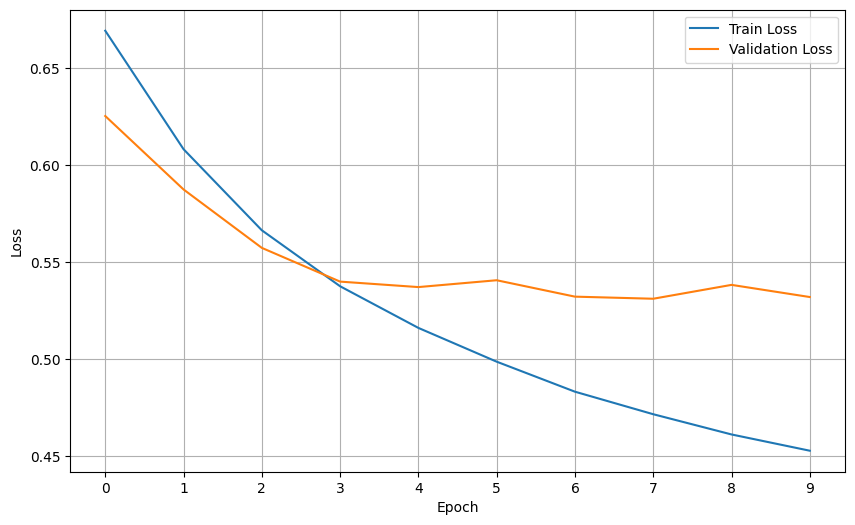

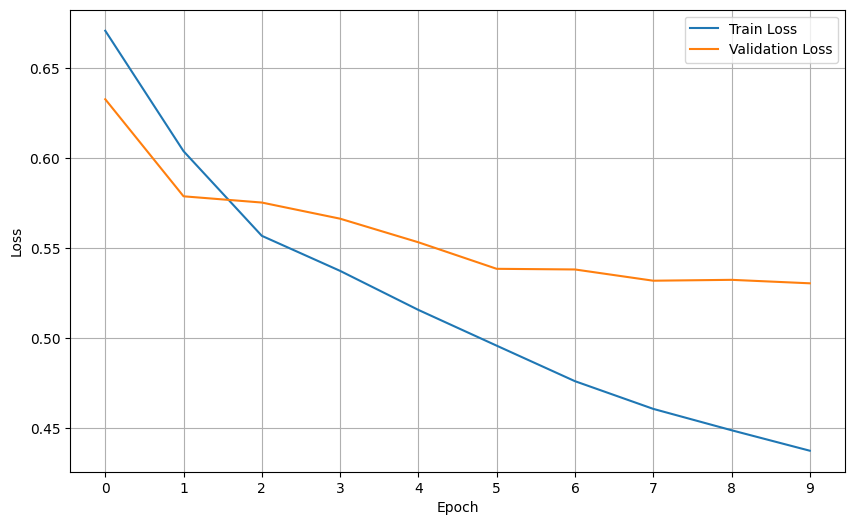

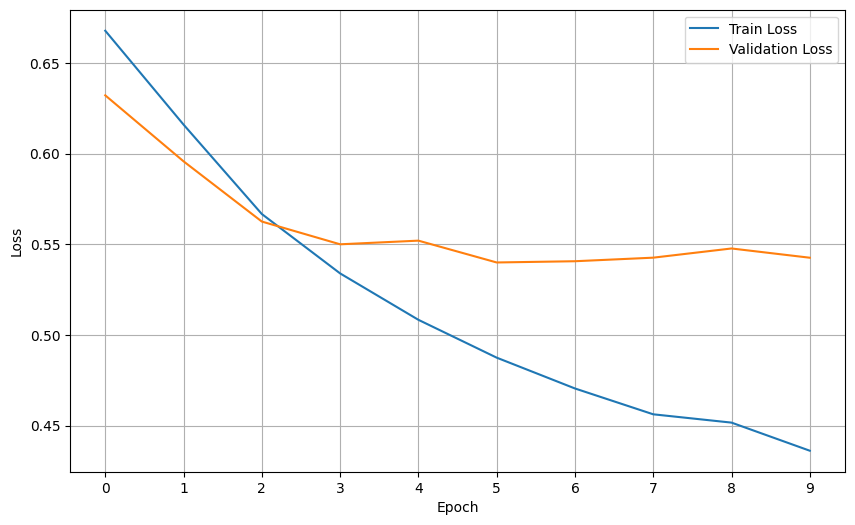

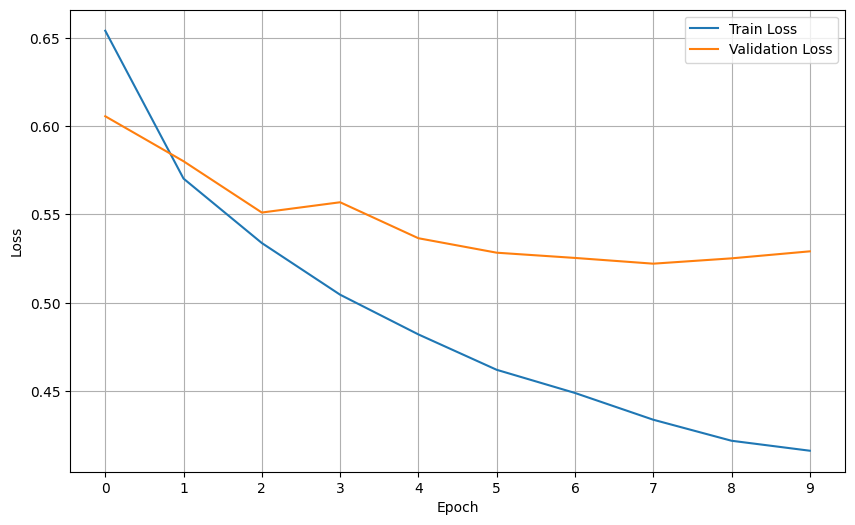

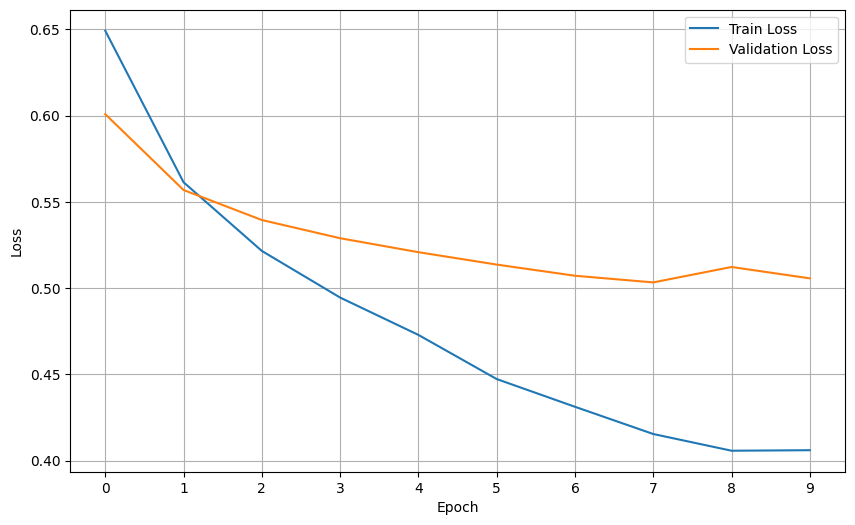

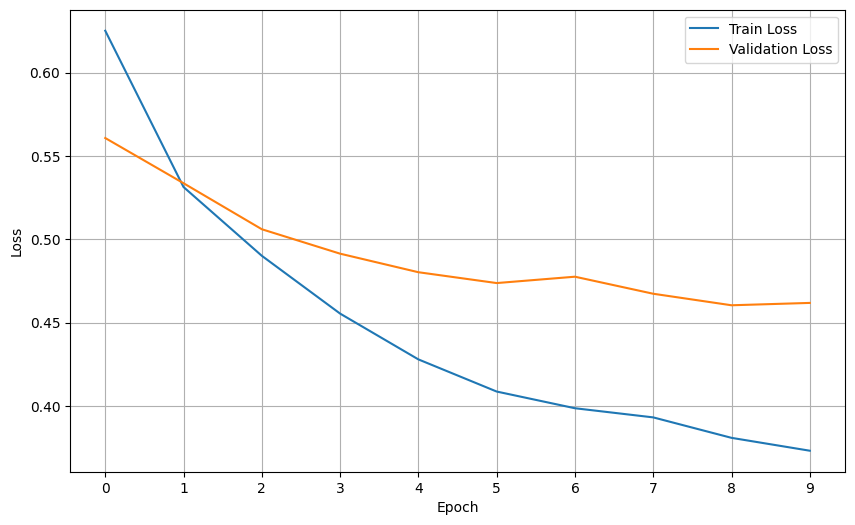

In [11]:
# Plot the loss graph
pipeline_synonym_5.plot_loss()
pipeline_synonym_10.plot_loss()
pipeline_synonym_20.plot_loss()
pipeline_synonym_50.plot_loss()
pipeline_synonym_100.plot_loss()
pipeline_synonym_200.plot_loss()

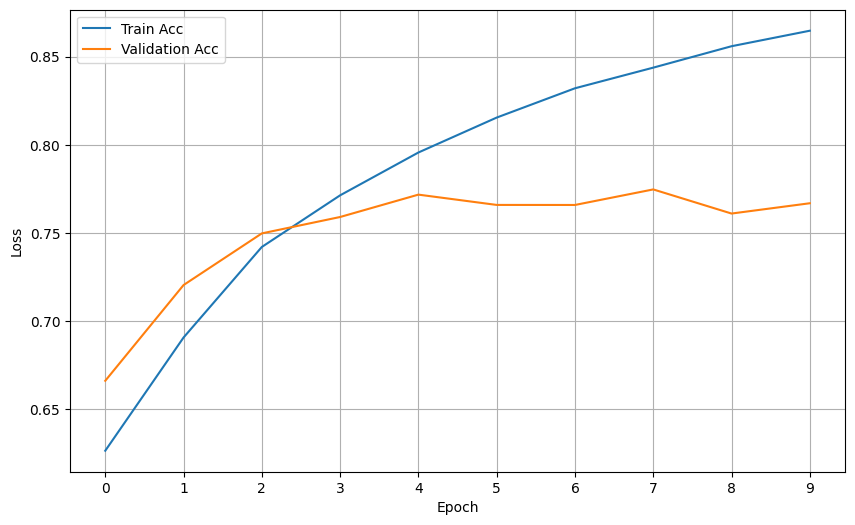

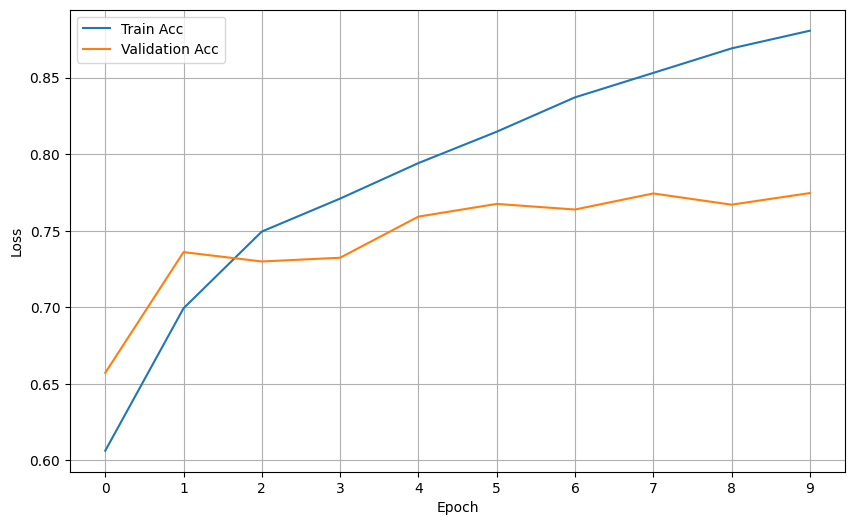

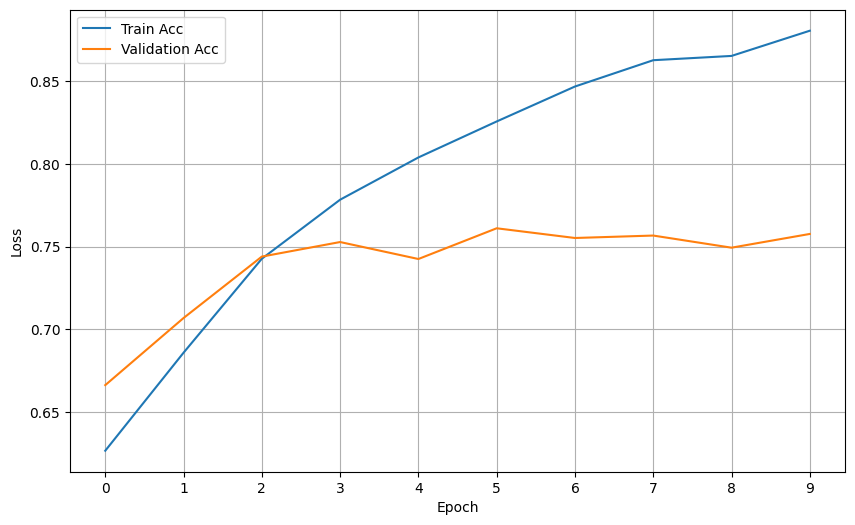

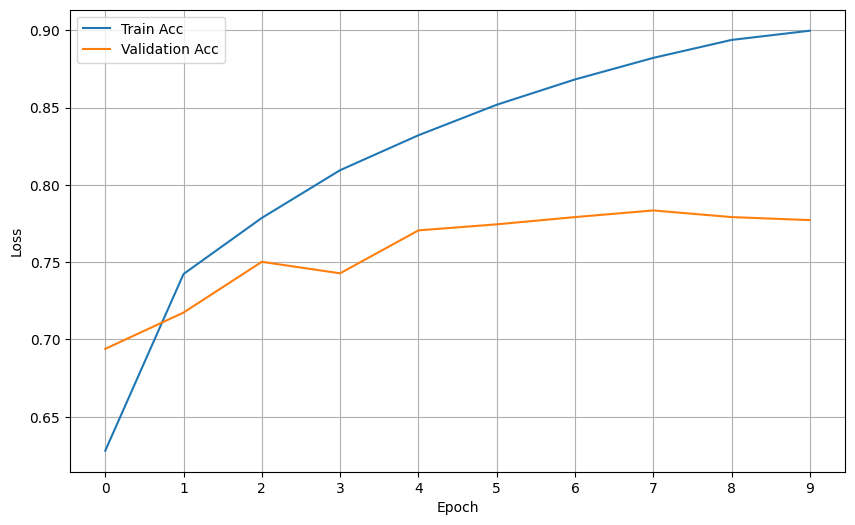

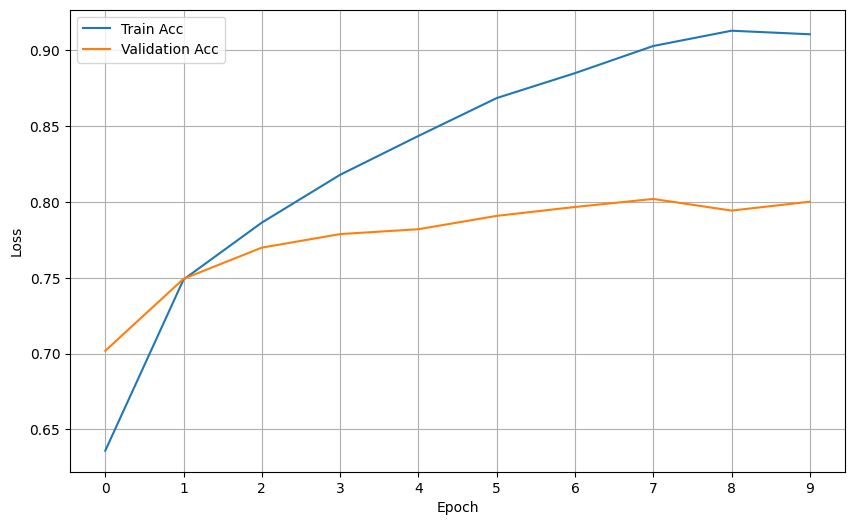

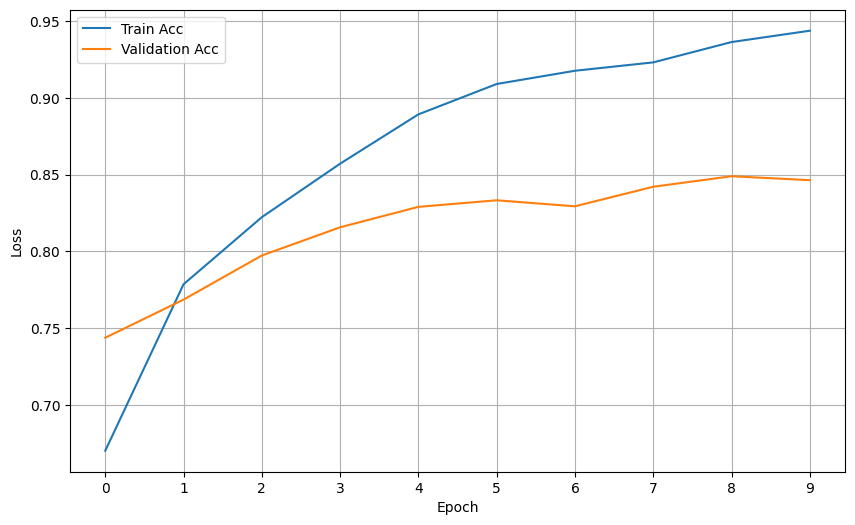

In [12]:
# Plot the acc graph
pipeline_synonym_5.plot_acc()
pipeline_synonym_10.plot_acc()
pipeline_synonym_20.plot_acc()
pipeline_synonym_50.plot_acc()
pipeline_synonym_100.plot_acc()
pipeline_synonym_200.plot_acc()

# Performance of Synonym Augmentation on LSTM

In [13]:
pipeline_synonym_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_10_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_20_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_50_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_100_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_200_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)


Map:   0%|          | 0/8955 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1791 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9381 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7504 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10233 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8186 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12788 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10230 [00:00<?, ? examples/s]

Map:   0%|          | 0/2558 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/25574 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20459 [00:00<?, ? examples/s]

Map:   0%|          | 0/5115 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [14]:
pipeline_synonym_5_LSTM.train_model(n_epochs=10)
pipeline_synonym_10_LSTM.train_model(n_epochs=10)
pipeline_synonym_20_LSTM.train_model(n_epochs=10)
pipeline_synonym_50_LSTM.train_model(n_epochs=10)
pipeline_synonym_100_LSTM.train_model(n_epochs=10)
pipeline_synonym_200_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Epoch: 1/10
Train Loss: 0.686, Train Acc: 0.549
Valid Loss: 0.651, Valid Acc: 0.660


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]


Epoch: 2/10
Train Loss: 0.606, Train Acc: 0.689
Valid Loss: 0.591, Valid Acc: 0.716


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


Epoch: 3/10
Train Loss: 0.549, Train Acc: 0.751
Valid Loss: 0.571, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]


Epoch: 4/10
Train Loss: 0.527, Train Acc: 0.773
Valid Loss: 0.562, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]


Epoch: 5/10
Train Loss: 0.506, Train Acc: 0.796
Valid Loss: 0.562, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


Epoch: 6/10
Train Loss: 0.484, Train Acc: 0.826
Valid Loss: 0.569, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 7/10
Train Loss: 0.472, Train Acc: 0.837
Valid Loss: 0.561, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


Epoch: 8/10
Train Loss: 0.456, Train Acc: 0.856
Valid Loss: 0.561, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


Epoch: 9/10
Train Loss: 0.451, Train Acc: 0.859
Valid Loss: 0.561, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


Epoch: 10/10
Train Loss: 0.442, Train Acc: 0.869
Valid Loss: 0.560, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Epoch: 1/10
Train Loss: 0.685, Train Acc: 0.553
Valid Loss: 0.639, Valid Acc: 0.682


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 2/10
Train Loss: 0.601, Train Acc: 0.700
Valid Loss: 0.588, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


Epoch: 3/10
Train Loss: 0.554, Train Acc: 0.745
Valid Loss: 0.545, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


Epoch: 4/10
Train Loss: 0.528, Train Acc: 0.768
Valid Loss: 0.540, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


Epoch: 5/10
Train Loss: 0.511, Train Acc: 0.792
Valid Loss: 0.543, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


Epoch: 6/10
Train Loss: 0.494, Train Acc: 0.812
Valid Loss: 0.535, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]


Epoch: 7/10
Train Loss: 0.477, Train Acc: 0.830
Valid Loss: 0.535, Valid Acc: 0.771


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


Epoch: 8/10
Train Loss: 0.459, Train Acc: 0.852
Valid Loss: 0.537, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]


Epoch: 9/10
Train Loss: 0.451, Train Acc: 0.859
Valid Loss: 0.552, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


Epoch: 10/10
Train Loss: 0.447, Train Acc: 0.865
Valid Loss: 0.535, Valid Acc: 0.769


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 1/10
Train Loss: 0.683, Train Acc: 0.554
Valid Loss: 0.626, Valid Acc: 0.679


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]


Epoch: 2/10
Train Loss: 0.606, Train Acc: 0.696
Valid Loss: 0.583, Valid Acc: 0.713


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


Epoch: 3/10
Train Loss: 0.550, Train Acc: 0.750
Valid Loss: 0.556, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


Epoch: 4/10
Train Loss: 0.515, Train Acc: 0.786
Valid Loss: 0.550, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 5/10
Train Loss: 0.492, Train Acc: 0.817
Valid Loss: 0.549, Valid Acc: 0.757


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]


Epoch: 6/10
Train Loss: 0.481, Train Acc: 0.827
Valid Loss: 0.546, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]


Epoch: 7/10
Train Loss: 0.466, Train Acc: 0.844
Valid Loss: 0.540, Valid Acc: 0.764


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


Epoch: 8/10
Train Loss: 0.453, Train Acc: 0.856
Valid Loss: 0.546, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]


Epoch: 9/10
Train Loss: 0.447, Train Acc: 0.863
Valid Loss: 0.565, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


Epoch: 10/10
Train Loss: 0.458, Train Acc: 0.852
Valid Loss: 0.542, Valid Acc: 0.762


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


Epoch: 1/10
Train Loss: 0.677, Train Acc: 0.579
Valid Loss: 0.630, Valid Acc: 0.668


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


Epoch: 2/10
Train Loss: 0.584, Train Acc: 0.716
Valid Loss: 0.566, Valid Acc: 0.732


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


Epoch: 3/10
Train Loss: 0.525, Train Acc: 0.781
Valid Loss: 0.545, Valid Acc: 0.752


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]


Epoch: 4/10
Train Loss: 0.493, Train Acc: 0.817
Valid Loss: 0.539, Valid Acc: 0.766


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


Epoch: 5/10
Train Loss: 0.470, Train Acc: 0.840
Valid Loss: 0.538, Valid Acc: 0.764


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]


Epoch: 6/10
Train Loss: 0.454, Train Acc: 0.858
Valid Loss: 0.536, Valid Acc: 0.768


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


Epoch: 7/10
Train Loss: 0.447, Train Acc: 0.864
Valid Loss: 0.546, Valid Acc: 0.758


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


Epoch: 8/10
Train Loss: 0.441, Train Acc: 0.870
Valid Loss: 0.538, Valid Acc: 0.770


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]


Epoch: 9/10
Train Loss: 0.434, Train Acc: 0.878
Valid Loss: 0.547, Valid Acc: 0.758


evaluating...: 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


Epoch: 10/10
Train Loss: 0.435, Train Acc: 0.877
Valid Loss: 0.548, Valid Acc: 0.759


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Epoch: 1/10
Train Loss: 0.647, Train Acc: 0.618
Valid Loss: 0.574, Valid Acc: 0.713


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


Epoch: 2/10
Train Loss: 0.557, Train Acc: 0.742
Valid Loss: 0.548, Valid Acc: 0.749


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]


Epoch: 3/10
Train Loss: 0.516, Train Acc: 0.784
Valid Loss: 0.540, Valid Acc: 0.759


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]


Epoch: 4/10
Train Loss: 0.493, Train Acc: 0.814
Valid Loss: 0.532, Valid Acc: 0.764


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


Epoch: 5/10
Train Loss: 0.474, Train Acc: 0.836
Valid Loss: 0.524, Valid Acc: 0.782


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]


Epoch: 6/10
Train Loss: 0.465, Train Acc: 0.842
Valid Loss: 0.536, Valid Acc: 0.772


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


Epoch: 7/10
Train Loss: 0.494, Train Acc: 0.816
Valid Loss: 0.527, Valid Acc: 0.779


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Epoch: 8/10
Train Loss: 0.449, Train Acc: 0.860
Valid Loss: 0.519, Valid Acc: 0.790


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Epoch: 9/10
Train Loss: 0.431, Train Acc: 0.880
Valid Loss: 0.515, Valid Acc: 0.795


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]


Epoch: 10/10
Train Loss: 0.422, Train Acc: 0.890
Valid Loss: 0.512, Valid Acc: 0.799


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]


Epoch: 1/10
Train Loss: 0.621, Train Acc: 0.650
Valid Loss: 0.553, Valid Acc: 0.742


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


Epoch: 2/10
Train Loss: 0.528, Train Acc: 0.774
Valid Loss: 0.533, Valid Acc: 0.769


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


Epoch: 3/10
Train Loss: 0.489, Train Acc: 0.817
Valid Loss: 0.511, Valid Acc: 0.795


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]


Epoch: 4/10
Train Loss: 0.458, Train Acc: 0.852
Valid Loss: 0.498, Valid Acc: 0.809


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]


Epoch: 5/10
Train Loss: 0.440, Train Acc: 0.872
Valid Loss: 0.503, Valid Acc: 0.806


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


Epoch: 6/10
Train Loss: 0.431, Train Acc: 0.881
Valid Loss: 0.496, Valid Acc: 0.812


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]


Epoch: 7/10
Train Loss: 0.419, Train Acc: 0.894
Valid Loss: 0.496, Valid Acc: 0.814


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


Epoch: 8/10
Train Loss: 0.415, Train Acc: 0.897
Valid Loss: 0.488, Valid Acc: 0.824


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]


Epoch: 9/10
Train Loss: 0.413, Train Acc: 0.899
Valid Loss: 0.488, Valid Acc: 0.821


evaluating...: 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

Epoch: 10/10
Train Loss: 0.403, Train Acc: 0.910
Valid Loss: 0.477, Valid Acc: 0.833


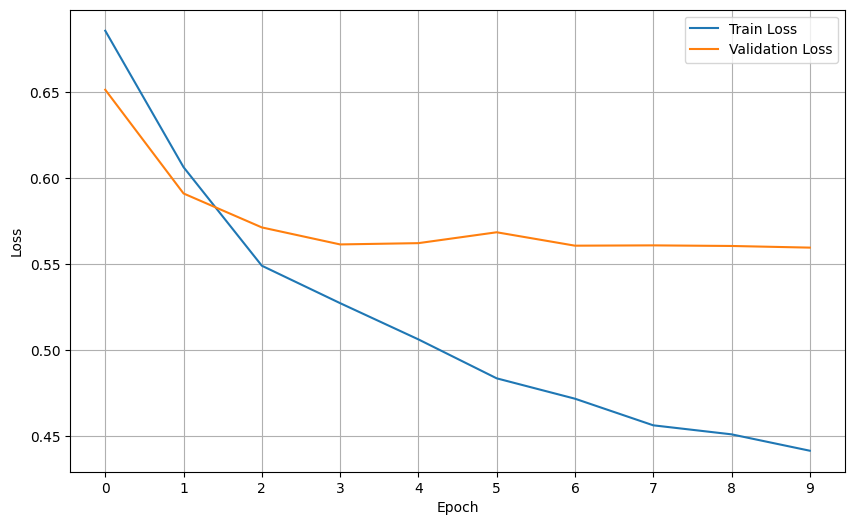

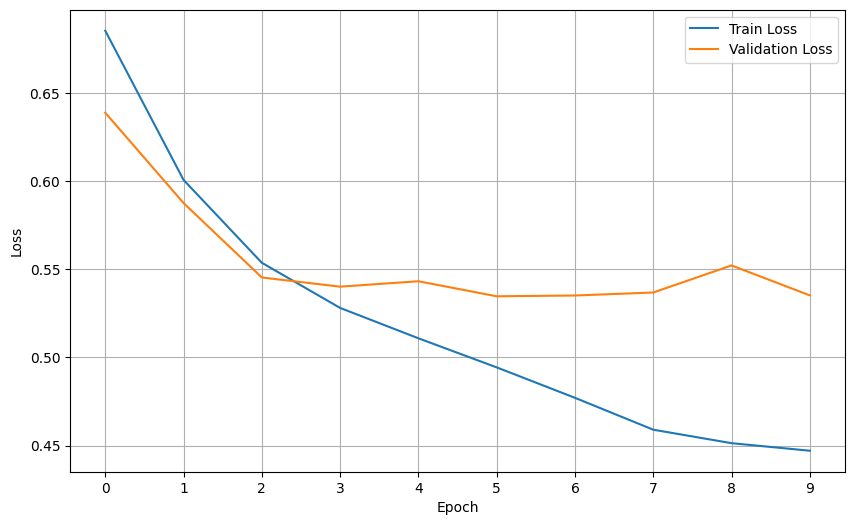

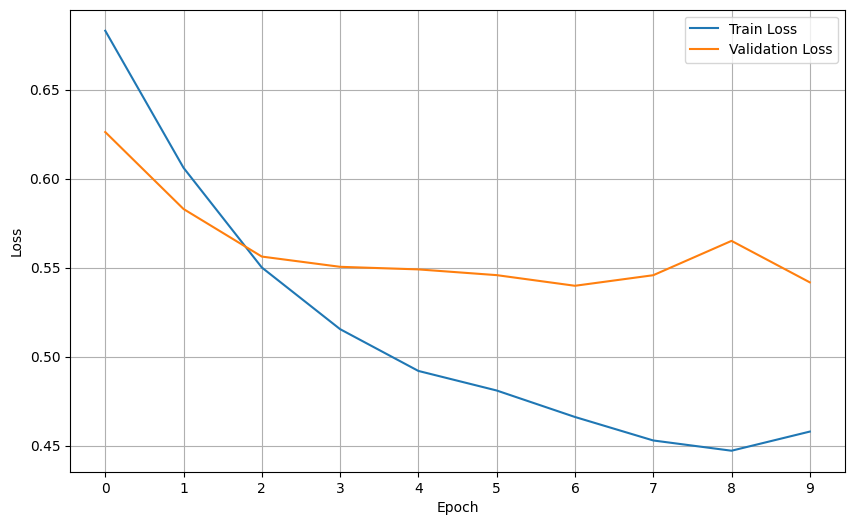

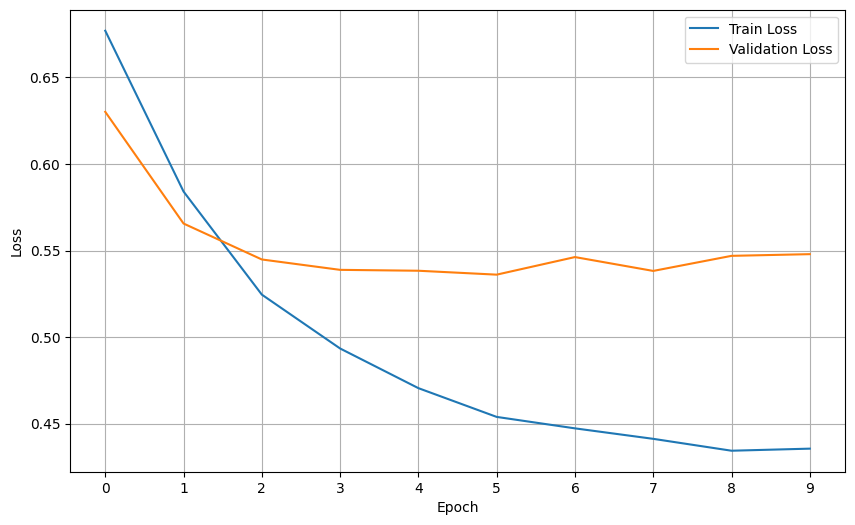

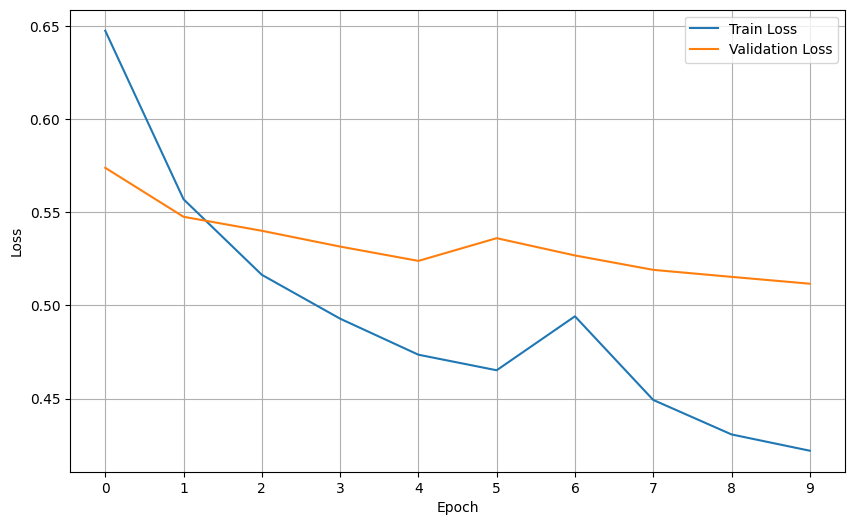

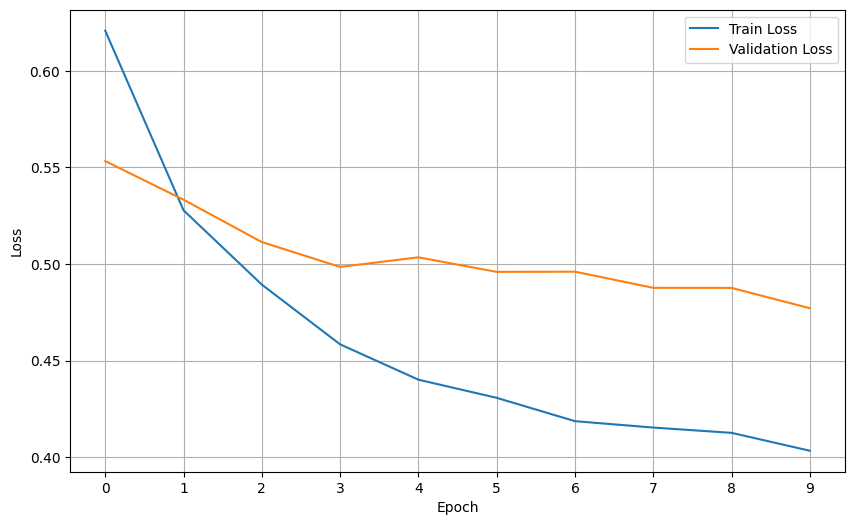

In [15]:
pipeline_synonym_5_LSTM.plot_loss()
pipeline_synonym_10_LSTM.plot_loss()
pipeline_synonym_20_LSTM.plot_loss()
pipeline_synonym_50_LSTM.plot_loss()
pipeline_synonym_100_LSTM.plot_loss()
pipeline_synonym_200_LSTM.plot_loss()

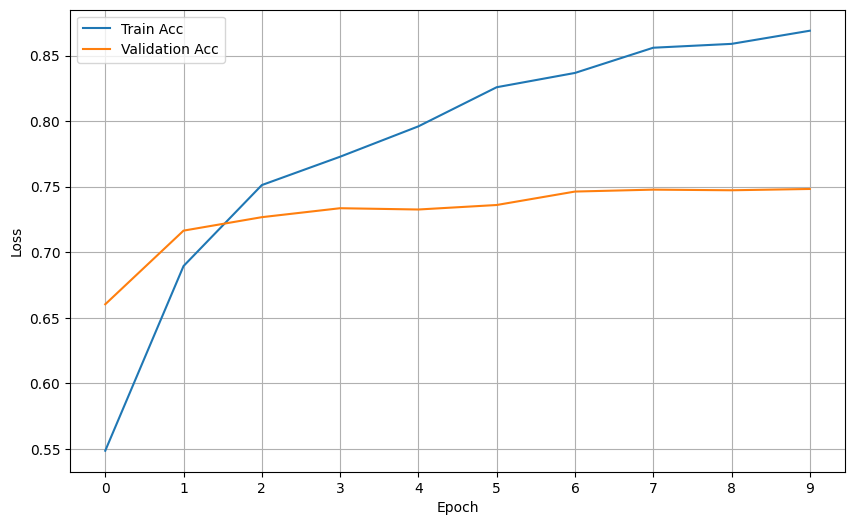

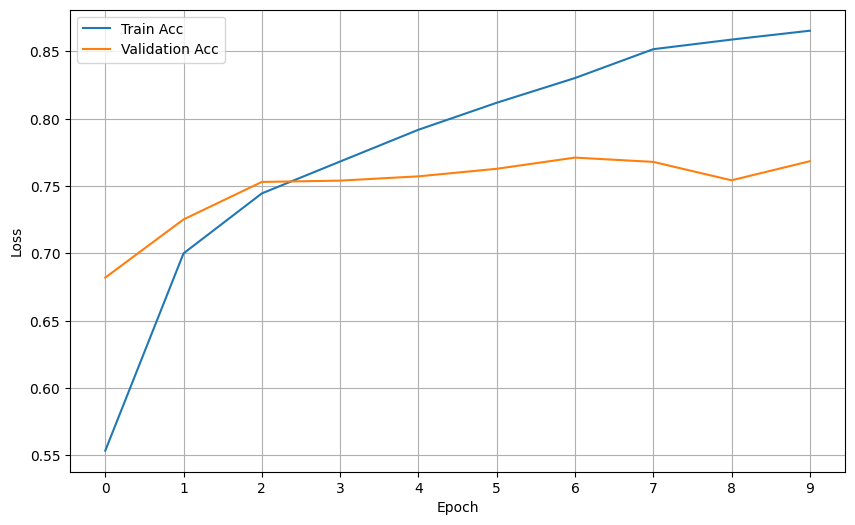

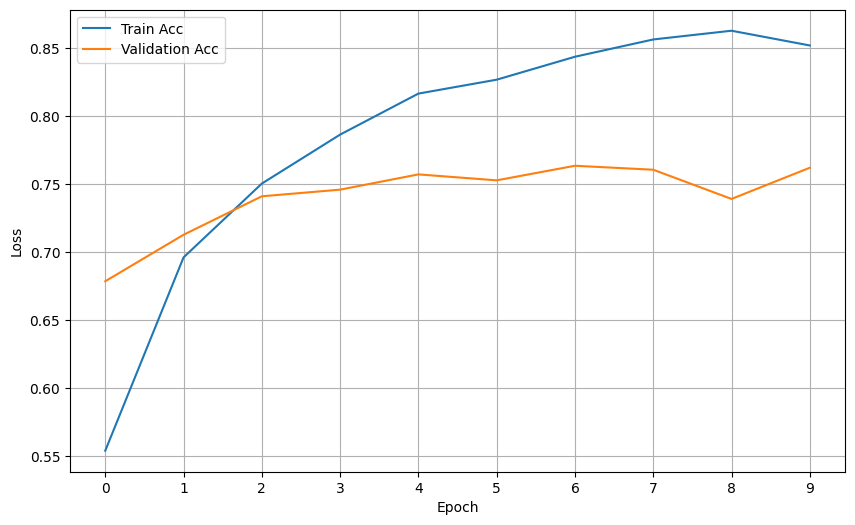

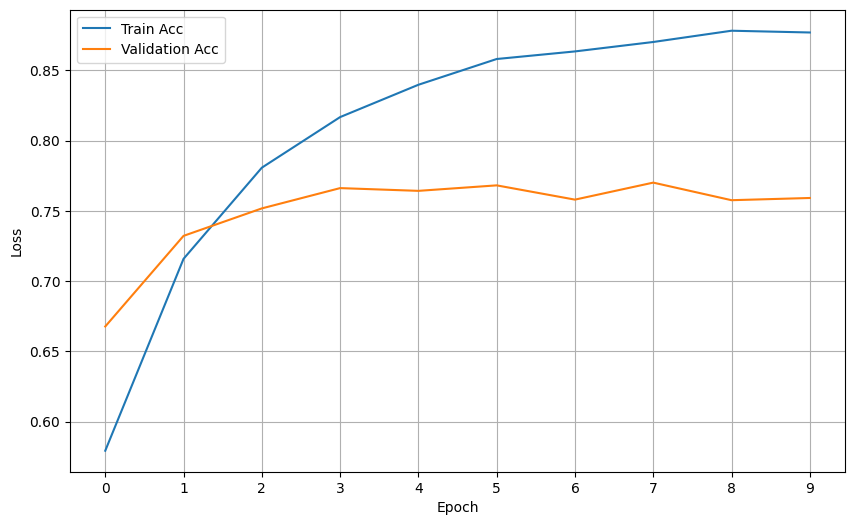

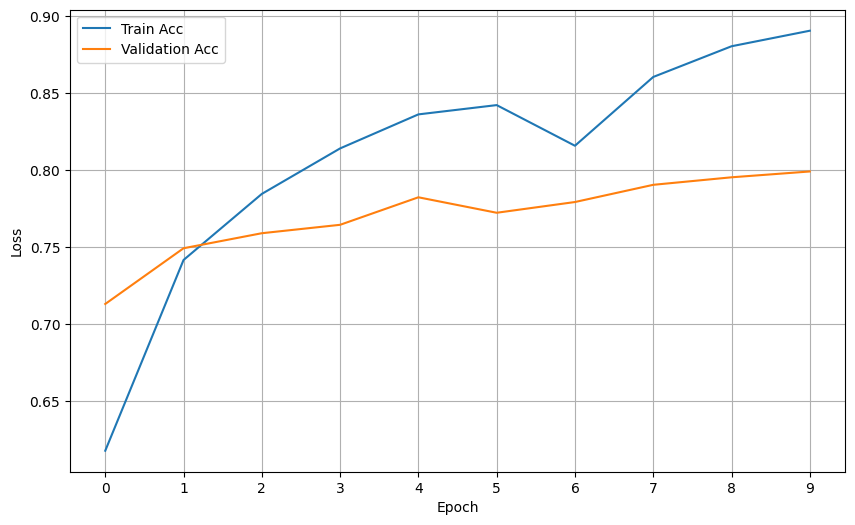

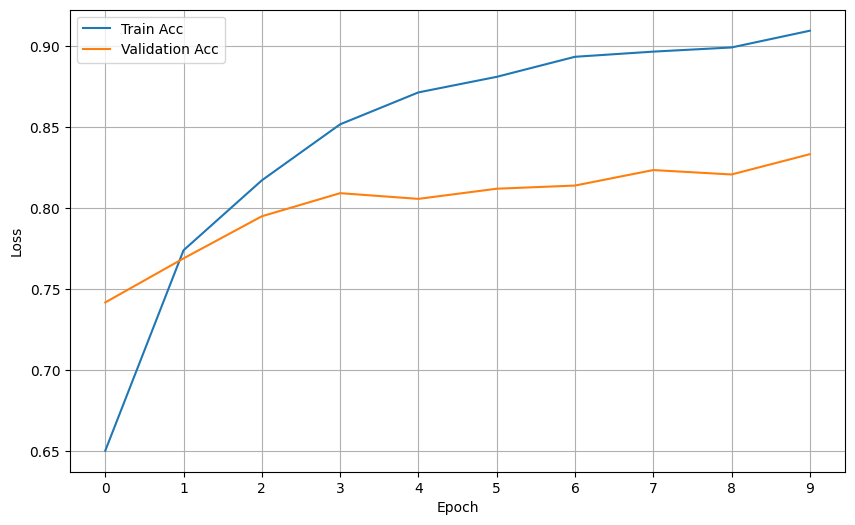

In [16]:
pipeline_synonym_5_LSTM.plot_acc()
pipeline_synonym_10_LSTM.plot_acc()
pipeline_synonym_20_LSTM.plot_acc()
pipeline_synonym_50_LSTM.plot_acc()
pipeline_synonym_100_LSTM.plot_acc()
pipeline_synonym_200_LSTM.plot_acc()